# Analysing customer's feedbacks and reviews to get insights of different brand values

In [1]:
import pandas as pd
posts=pd.read_csv('E:\Extra Projects\Web Scrapping\Posts.csv')

In [2]:
print(posts)

      Unnamed: 0    Date           User  \
0              0  Oct-25      driver100   
1              1  Oct-25  28firefighter   
2              2  Oct-25           bwia   
3              3  Oct-25       jmonroe1   
4              4  Oct-25         suydam   
...          ...     ...            ...   
5016        5016  Jul-01    snakeweasel   
5017        5017  Jul-01    snakeweasel   
5018        5018  Jul-01            sda   
5019        5019  Jul-01        omarman   
5020        5020  Jul-01       jmonroe1   

                                                   Text  
0     Just saw this story on the national news in Ca...  
1     Or check the secondary market and shops and do...  
2     driver100 said:\nMike, hoping for the best pos...  
3     driver100 said:\nJust saw this story on the na...  
4     snakeweasel said:\nshow previous quotes\n\n\nW...  
...                                                 ...  
5016  oldfarmer50 said:\nshow previous quotes\n\n\n\...  
5017  oldfarmer50 s

In [3]:
# To Replace \n if any from texts to " "

posts = posts.replace(r'\n',' ', regex=True)
posts = posts.replace(r'\r',' ', regex=True)
posts.head(2)

,Unnamed: 0,Date,User,Text
0,0,Oct-25,driver100,Just saw this story on the national news in Ca...
1,1,Oct-25,28firefighter,Or check the secondary market and shops and do...


In [4]:
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize

# Brand values in terms of frequency

In [5]:
from string import punctuation
def unique_words(s):
# Remove punctuation & others, convert to lower and finally stopwords
    s=str(s)
    for p in punctuation:
        s =s.replace(p,'')
    s=s.lower()
    return list(set(re.findall('\w+',s)))

posts['unique_words_list']=posts['Text'].map(unique_words)

In [6]:
posts[:5]

,Unnamed: 0,Date,User,Text,unique_words_list
0,0,Oct-25,driver100,Just saw this story on the national news in Ca...,"[to, use, upsets, friendly, get, way, that, sa..."
1,1,Oct-25,28firefighter,Or check the secondary market and shops and do...,"[the, 6mt, 36r, subaru, 2004, outback, or, rex..."
2,2,Oct-25,bwia,"driver100 said: Mike, hoping for the best poss...","[the, said, outcome, all, for, prayers, hoping..."
3,3,Oct-25,jmonroe1,driver100 said: Just saw this story on the nat...,"[to, use, driver100, some, upsets, friendly, g..."
4,4,Oct-25,suydam,snakeweasel said: show previous quotes We re...,"[the, 17, a, premiere, buick, 400, your, as, c..."


In [7]:
# Mapping  to brand
car_mapping=pd.read_csv('E:\Extra Projects\Web Scrapping\car-list.csv')
def lowering (s):
    s=s.rstrip()
    return s.lower()
car_mapping['model']=car_mapping['model'].map(lowering)
car_mapping['brand']=car_mapping['brand'].map(lowering)

In [8]:
def mentioned_brands(list_1):
    list_i=pd.DataFrame(list_1)
    mask=car_mapping['model'].isin(pd.Series(list_1))
    joiner=car_mapping[mask]
    joined=joiner.merge(list_i, left_on='model', right_on=0)
    out=set(list(joined['brand']))
    return list(out)

posts['unique_brands']=posts['unique_words_list'].map(mentioned_brands)

In [9]:
posts.head()

,Unnamed: 0,Date,User,Text,unique_words_list,unique_brands
0,0,Oct-25,driver100,Just saw this story on the national news in Ca...,"[to, use, upsets, friendly, get, way, that, sa...","[ nissan, mercedes-benz, lexus]"
1,1,Oct-25,28firefighter,Or check the secondary market and shops and do...,"[the, 6mt, 36r, subaru, 2004, outback, or, rex...","[ bmw, subaru]"
2,2,Oct-25,bwia,"driver100 said: Mike, hoping for the best poss...","[the, said, outcome, all, for, prayers, hoping...",[]
3,3,Oct-25,jmonroe1,driver100 said: Just saw this story on the nat...,"[to, use, driver100, some, upsets, friendly, g...","[ nissan, mercedes-benz, lexus]"
4,4,Oct-25,suydam,snakeweasel said: show previous quotes We re...,"[the, 17, a, premiere, buick, 400, your, as, c...","[ mercedes-benz, lexus, rover]"


In [10]:
unique_brands_superlist=posts['unique_brands'].sum()
unique_brands=nltk.FreqDist(unique_brands_superlist)
unique_brands=pd.DataFrame.from_dict(unique_brands, orient='index', columns=['freq']).sort_values(by='freq', ascending=False)

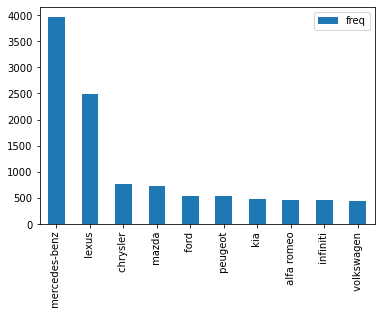

In [11]:
unique_brands[:10].plot(kind='bar')

In [12]:
import numpy as np
from itertools import combinations, groupby
from collections import Counter

# Sample data
unique_brands_list = list(unique_brands.index.values)
def combination_of_2(set):
    return list(combinations(set,2))

posts['combinations_of_2']=posts['unique_brands'].map(combination_of_2)
set_of_1=posts['unique_brands'].sum()
set_of_2=posts['combinations_of_2'].sum()

from collections import Counter
count_1s=Counter(set_of_1)
count_2s=Counter(set_of_2)

In [13]:
unique_name=unique_brands.index.values
matrix = pd.DataFrame(index=unique_name, columns=unique_name)
for row in unique_name:
       for column in unique_name:
            if row==column:
                matrix.loc[row,column]=0
            else:
                matrix.loc[row,column]=((count_2s[(row, column)]+count_2s[(column, row)])*len(posts)*1.0)/(count_1s[row]*count_1s[column]*1.0)
matrix.iloc[:14,:14]

,mercedes-benz,lexus,chrysler,mazda,ford,peugeot,kia,alfa romeo,infiniti,volkswagen,audi,hyundai,subaru,bmw
mercedes-benz,0,1.1075,1.05054,1.19448,1.10307,1.01648,1.10916,1.10579,1.11155,1.10807,1.11452,1.02423,0.998722,0.983551
lexus,1.1075,0,0.974213,1.33168,1.05601,0.967937,1.0013,1.01415,1.18653,1.27561,1.21963,1.00716,0.817899,0.88822
chrysler,1.05054,0.974213,0,1.154,5.4235,3.8142,6.16014,6.22825,1.31835,0.510653,0.697559,5.40824,0.054243,0.110309
mazda,1.19448,1.33168,1.154,0,1.37435,0.975987,1.32971,1.33537,1.74286,1.83078,1.76589,1.28744,0.759998,0.811409
ford,1.10307,1.05601,5.4235,1.37435,0,0.363703,8.59574,8.84715,1.70498,0.630148,0.82036,0.367166,0.278156,0.308543
peugeot,1.01648,0.967937,3.8142,0.975987,0.363703,0,0.220783,0.120939,0.47061,0.49861,0.52631,7.85676,0.0521961,0.106147
kia,1.10916,1.0013,6.16014,1.32971,8.59574,0.220783,0,10.004,1.884,0.65725,0.899323,0.170203,0.11722,0.268178
alfa romeo,1.10579,1.01415,6.22825,1.33537,8.84715,0.120939,10.004,0,1.8228,0.660047,0.851542,0.227904,0.206008,0.359092
infiniti,1.11155,1.18653,1.31835,1.74286,1.70498,0.47061,1.884,1.8228,0,1.71229,1.3883,0.549454,0.926114,1.79223
volkswagen,1.10807,1.27561,0.510653,1.83078,0.630148,0.49861,0.65725,0.660047,1.71229,0,5.93912,1.16429,0.506433,0.418393


<Figure size 1800x1440 with 0 Axes>

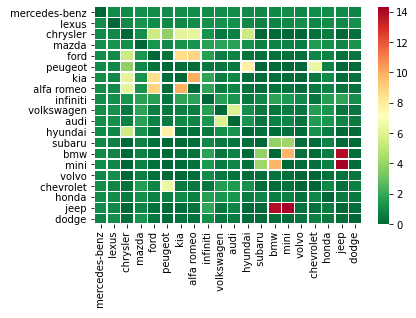

<Figure size 1800x1440 with 0 Axes>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
matrix_c = matrix.iloc[:20,:20].apply(pd.to_numeric, errors='coerce')
matrix_c
sns.heatmap(matrix_c, cmap='RdYlGn_r', linewidths=0.5)
plt.figure(figsize=(25,20))
#plt.show()

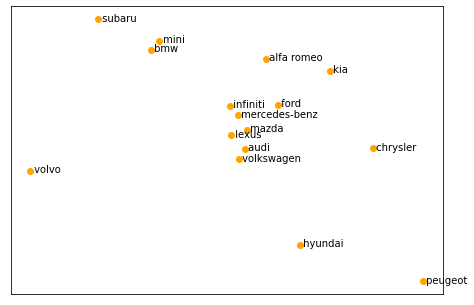

In [15]:
matrix_1=matrix.iloc[:16,:16]
matrix_1=matrix_1.replace(np.nan,0)

import numpy as np
from sklearn import manifold
from sklearn.manifold import MDS

mdsdf = 1/matrix_1

mdsdf=mdsdf.replace(np.nan,0)
mdsdf=mdsdf.replace(np.inf,0)

mdsmatrix=mdsdf.values

from matplotlib import pyplot as plt

mds=manifold.MDS(n_components=2, dissimilarity ='precomputed', random_state=10)

results=mds.fit(mdsmatrix)
coords=results.embedding_

x=coords[:,0]
y=coords[:,1]

ax=plt.axes([0.,0.,1.,1.])
plt.scatter(x,y,marker='o',color='orange')

n=list(mdsdf.index)

for i,n in enumerate(n):
    #print(x[i].item())
    #print(n)
    #print(type(y[i]))
    if n=='kia':
        ax.annotate(n,xy=((x[i]+.01),y[i]-.01))
    else:
        ax.annotate(n,xy=((x[i]+.01),y[i]-.02))

plt.xticks([])
plt.yticks([])

plt.show()

# Insights for Brand managing department

As per the analysis, Mercedes-Benz is facing a really tough competition from infiniti, ford, lexus and mazda. Despite of the fact that they are perceived to be playing in very different league. Another interesting fact is appearance of these brands really close to these mercedes-benz and audi which is unexpected as they aren't a premiere league car. BMW is appearing really far away from all of these which is strange again as these are perceived to be equivalent brands

In our MDS mapping, Kia and Mazda are one of the two brand pairs far apart, meaning that they were the least frequently mentioned pair in the posts we collected. This is surprising because our perception was that these two brands are close competitors.

If lexus and Mazda are actually closer to VW and audi in the minds of the crowd, then japan makers should be trying to differentiate itself from its German competitors while retaining the positive aspects of being compared with VW and Audi. For example, German cars are usually more associated with clean, high quality interiors. Japan makers can try to match this attention to detail, but offer people a lower cost (up front and maintenance).

As per our analysis, Mercedes-Benz is facing a really tough competition from Japan makers. Despite of the fact that they are perceived to be playing in very different league. Another interesting fact is appearance of Mazda really close to these brands which is unexpected as it isn't a premiere league car.

In [16]:
unique_brands_superlist=posts['unique_brands'].sum()
top_5_brands=unique_brands[:5]
car_mapping1=car_mapping.merge(top_5_brands,left_on='brand',right_index=True,how='inner')
def mentioned_topbrands(list_1):
    list_i=pd.DataFrame(list_1)
    mask=car_mapping1['model'].isin(pd.Series(list_1))
    joiner=car_mapping1[mask]
    joined=joiner.merge(list_i, left_on='model', right_on=0)
    out=set(list(joined['brand']))
    return list(out)

posts['unique_topbrands']=posts['unique_words_list'].map(mentioned_topbrands)

In [17]:
posts.head()

,Unnamed: 0,Date,User,Text,unique_words_list,unique_brands,combinations_of_2,unique_topbrands
0,0,Oct-25,driver100,Just saw this story on the national news in Ca...,"[to, use, upsets, friendly, get, way, that, sa...","[ nissan, mercedes-benz, lexus]","[( nissan, mercedes-benz), ( nissan, lexus),...","[ mercedes-benz, lexus]"
1,1,Oct-25,28firefighter,Or check the secondary market and shops and do...,"[the, 6mt, 36r, subaru, 2004, outback, or, rex...","[ bmw, subaru]","[( bmw, subaru)]",[]
2,2,Oct-25,bwia,"driver100 said: Mike, hoping for the best poss...","[the, said, outcome, all, for, prayers, hoping...",[],[],[]
3,3,Oct-25,jmonroe1,driver100 said: Just saw this story on the nat...,"[to, use, driver100, some, upsets, friendly, g...","[ nissan, mercedes-benz, lexus]","[( nissan, mercedes-benz), ( nissan, lexus),...","[ mercedes-benz, lexus]"
4,4,Oct-25,suydam,snakeweasel said: show previous quotes We re...,"[the, 17, a, premiere, buick, 400, your, as, c...","[ mercedes-benz, lexus, rover]","[( mercedes-benz, lexus), ( mercedes-benz, r...","[ mercedes-benz, lexus]"


In [18]:
# replacing models and brands with empty string"
def joining(s):
    s1=" ".join(s)
    return s1
posts['words combined']=posts['unique_words_list1']=posts['unique_words_list'].map(joining)
a=posts['words combined'].str.cat(sep = ' ')
brand=list(car_mapping['brand'])
brand1=[]
for i in brand:
    j=str(i).replace(' ','')
    brand1.append(j)
for p in brand1:
    a1=str(a).replace(p,"")

for p in list(car_mapping['model']):
    a2=str(a1).replace(p,"")

In [19]:
attrbute_mapping=pd.read_csv("E:\Extra Projects\Web Scrapping\Attributesmapping.csv")
attrbute_mapping[24:29]

,words,count,attributes
24,sport,652,performance
25,good,639,performance
26,even,621,performance
27,new,614,features n look
28,day,597,NaN


In [20]:
attrbute_mapping=attrbute_mapping.dropna(how='any')
attrbute_mapping.head()

,words,count,attributes
12,previous,910,practical
13,time,908,practical
15,think,842,practical
17,wife,771,practical
21,need,687,desire


In [21]:

top5_brands=unique_brands[:5]
top5_brands

,freq
mercedes-benz,3961
lexus,2486
chrysler,765
mazda,728
ford,547


In [22]:
from pandas import Series, DataFrame
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
s = re.findall('\w+', a2)
s = [w for w in s if not w in stop_words]
lemmatizer = WordNetLemmatizer()
s = Series(s).map(lemmatizer.lemmatize)
attribute_freq=DataFrame(s.value_counts())
#attribute_freq

In [23]:
def mentioned_attributes(list_1):
    list_i=pd.DataFrame(list_1)
    mask=attrbute_mapping['words'].isin(pd.Series(list_1))
    joiner=attrbute_mapping[mask]
    joined=joiner.merge(list_i, left_on='words', right_on=0)
    out=set(list(joined['attributes'].dropna()))
    return list(out)

posts['unique_attributes']=posts['unique_words_list'].map(mentioned_attributes)

In [24]:
posts['brand_attr']=posts['unique_topbrands']+posts['unique_attributes']

In [25]:
posts.head()

,Unnamed: 0,Date,User,Text,unique_words_list,unique_brands,combinations_of_2,unique_topbrands,words combined,unique_words_list1,unique_attributes,brand_attr
0,0,Oct-25,driver100,Just saw this story on the national news in Ca...,"[to, use, upsets, friendly, get, way, that, sa...","[ nissan, mercedes-benz, lexus]","[( nissan, mercedes-benz), ( nissan, lexus),...","[ mercedes-benz, lexus]",to use upsets friendly get way that save 2014 ...,to use upsets friendly get way that save 2014 ...,"[practical, features n look, performance]","[ mercedes-benz, lexus, practical, features n..."
1,1,Oct-25,28firefighter,Or check the secondary market and shops and do...,"[the, 6mt, 36r, subaru, 2004, outback, or, rex...","[ bmw, subaru]","[( bmw, subaru)]",[],the 6mt 36r subaru 2004 outback or rex don t z...,the 6mt 36r subaru 2004 outback or rex don t z...,[],[]
2,2,Oct-25,bwia,"driver100 said: Mike, hoping for the best poss...","[the, said, outcome, all, for, prayers, hoping...",[],[],[],the said outcome all for prayers hoping driver...,the said outcome all for prayers hoping driver...,[practical],[practical]
3,3,Oct-25,jmonroe1,driver100 said: Just saw this story on the nat...,"[to, use, driver100, some, upsets, friendly, g...","[ nissan, mercedes-benz, lexus]","[( nissan, mercedes-benz), ( nissan, lexus),...","[ mercedes-benz, lexus]",to use driver100 some upsets friendly get lear...,to use driver100 some upsets friendly get lear...,"[practical, features n look, performance]","[ mercedes-benz, lexus, practical, features n..."
4,4,Oct-25,suydam,snakeweasel said: show previous quotes We re...,"[the, 17, a, premiere, buick, 400, your, as, c...","[ mercedes-benz, lexus, rover]","[( mercedes-benz, lexus), ( mercedes-benz, r...","[ mercedes-benz, lexus]",the 17 a premiere buick 400 your as convenienc...,the 17 a premiere buick 400 your as convenienc...,"[practical, desire, features n look, performance]","[ mercedes-benz, lexus, practical, desire, fe..."


In [26]:
##If you want distinct count of frequencies of attributes
unique_attributes=nltk.FreqDist(posts['unique_attributes'].sum())
unique_attributes=pd.DataFrame.from_dict(unique_attributes, orient='index', columns=['freq']).sort_values(by='freq', ascending=False)
unique_attributes[:5]

,freq
practical,3749
performance,3028
features n look,2684
durability,1865
desire,1022


# Attributes in terms of prices, family, durability, mileage and safety

In [27]:
# Sample data
unique_attributes_list = list(unique_attributes.index.values)

In [28]:
from itertools import combinations
def combination_of_2(set):
    return list(combinations(set,2))

posts['combinations_of_2_1']=posts['brand_attr'].map(combination_of_2)

In [29]:
#Time taking chunk of code
for i in range(len(posts)):
    posts['combinations_of_2_1'][i]=list(set(posts['combinations_of_2_1'][i])-set(posts['combinations_of_2'][i]))

<ipython-input-29-6291ba16675b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts['combinations_of_2_1'][i]=list(set(posts['combinations_of_2_1'][i])-set(posts['combinations_of_2'][i]))


In [30]:
posts['combinations_of_brandattr']=posts['brand_attr'].map(combination_of_2)
posts['combinations_of_brandattr'][:5]

0    [( mercedes-benz,  lexus), ( mercedes-benz, pr...
1                                                   []
2                                                   []
3    [( mercedes-benz,  lexus), ( mercedes-benz, pr...
4    [( mercedes-benz,  lexus), ( mercedes-benz, pr...
Name: combinations_of_brandattr, dtype: object

In [31]:
set_of_1_comb=posts['combinations_of_2_1'].sum()

In [32]:
set_of_2_attr=posts['unique_attributes'].sum()
set_of_2_attr[:3]

['practical', 'features n look', 'performance']

In [33]:
from collections import Counter
count_2s_comb=Counter(set_of_1_comb)
# count_2s_comb is a dictionary with count of occurences of pairs

In [34]:

count_1_attr=Counter(posts['brand_attr'].sum())
# count_1_attr is a dictionary with count of occurences of pairs

In [35]:
unique_row_name=top5_brands.index.values
unique_column_name=unique_attributes.index.values
matrix_ba = pd.DataFrame(index=unique_row_name, columns=unique_column_name)

In [36]:
for row in unique_row_name:
       for column in unique_column_name:
            if count_1_attr[row]*count_1_attr[column]==0:
                matrix_ba.loc[row,column]=0
            else:
                matrix_ba.loc[row,column]=((count_2s_comb[(row, column)]+count_2s_comb[(column, row)])*1.0)*len(posts)/(count_1_attr[row]*count_1_attr[column])*1.0

In [37]:
matrix_ba = matrix_ba.apply(pd.to_numeric, errors='coerce')
matrix_ba

,practical,performance,features n look,durability,desire
mercedes-benz,1.082320,1.121926,1.112700,1.147305,1.142337
lexus,1.113023,1.145926,1.163365,1.189084,1.270718
chrysler,1.116951,0.927719,1.843816,1.041698,0.989005
mazda,1.203154,1.327919,1.302820,1.593886,1.484672
ford,1.160555,1.030685,1.751017,1.181232,1.167603


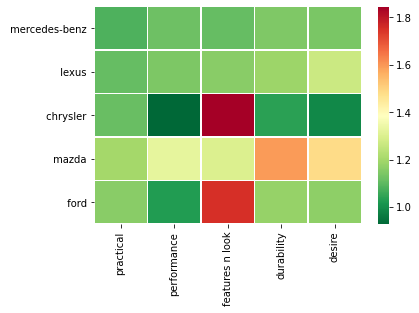

In [38]:
sns.heatmap(matrix_ba, cmap='RdYlGn_r', linewidths=0.5)

According to the data we scrapped, BMW doesn't appear in top for any of these positive attributes. So BMW as it claims to be "ultimate driving machine" doesn't seem to be the case atleast for our bunch of users

# More insights for Product & Marketing teams
Continuing with Mereceds-benz, a product manager can look at associations with their cars and see that their brand is lowest in desirability, features, and look. To improve their association with these attributes, product managers can focus more on the internal and external design of their cars. A marketing manager can leverage the association of mercedes with performance with a new design scheme to increase desirability. Mercedes and Lexus are almost associated with the attributes in a similar way except for desire. It would be better for product managers at lexus to focus on improving performance to be able to be on par with Mercedes.Mercedes might look into price listing for their cars to attract more customers and increase customer's desire.

Again we also see Chrysler and Ford in very close competition across all attributes, but we also see Mazda with very high association with these same features. The marketing managers at the luxury brands, Chrysler and ford, should be trying to market their supposedly superior features to people that are talking about Mazda. Mazda product managers need to ensure that their vehicles actually perform to the expectations of the users. Mazda leads in durability by far, and should work to keep that differentiation